<a href="https://colab.research.google.com/github/alik220/Statisctic.-Funnel-of-events/blob/main/Funnel%20of%20events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Description**

Есть стартап, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи мобильного приложения.
Изучим воронку продаж. Узнаем, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуем результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

###**1**

### **Reading and preparing the data**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
import re
import warnings
warnings.filterwarnings("ignore") 
from scipy import stats as st
import math as mth

In [7]:
!gdown --id 11U8sCEJI3EPO6odt_e72rY3Ito9kGOwL

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=11U8sCEJI3EPO6odt_e72rY3Ito9kGOwL
To: /content/logs_exp.csv
100% 13.2M/13.2M [00:00<00:00, 188MB/s]


In [8]:
df = pd.read_csv('logs_exp.csv', sep='\t')

**Description the data**

- `EventName` — название события;
- `DeviceIDHash` — уникальный идентификатор пользователя;
- `EventTimestamp` — время события;
- `ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

In [9]:
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


- Замените названия столбцов на удобные для вас;
- Проверьте пропуски и типы данных. Откорректируйте, если нужно;
- Добавьте столбец даты и времени, а также отдельный столбец дат;

In [11]:
df.rename(columns={'EventName' : 'name', 'DeviceIDHash': 'user_id', 'EventTimestamp': 'timestamp', 'ExpId' : 'exp_id'}, inplace=True)
df.head()

,name,user_id,timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [13]:
df['date'] = df['timestamp'].dt.strftime('%Y-%m-%d')

In [14]:
df.duplicated().sum()

413

In [15]:
df = df.drop_duplicates().reset_index(drop=True)
df.head()

,name,user_id,timestamp,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


**Summory**

- `name` — название события;
- `user_id` — уникальный идентификатор пользователя;
- `timestamp` — дата и время события;
- `exp_id` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.
- `date` — дата события;

### **2. Изучение и проверка данных**
- Сколько всего событий в логе?
- Сколько всего пользователей в логе?
- Сколько в среднем событий приходится на пользователя?

**Событий в логе:**

In [ ]:
df['name'].count()

243713

**Пользователей в логе:**

In [ ]:
df.user_id.nunique()

7551

**В среднем на пользователя приходится событий:**

In [ ]:
int(df.groupby('user_id')['name'].agg('count').median())

20

**Данные представлены за период**

In [16]:
(df['timestamp'].min(), df['timestamp'].max())

(Timestamp('2019-07-25 04:43:36'), Timestamp('2019-08-07 21:15:17'))

- Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого  — это может «перекашивать данные». Определите, с какого момента данные полные, и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
- Много ли событий и пользователей вы потеряли, отбросив старые данные?
- Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

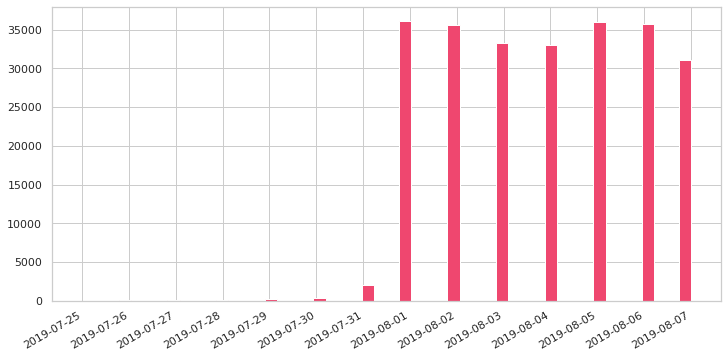

In [ ]:
fig = plt.figure(figsize = (12, 6))
h = df['date'].hist(bins = 50)
fig.autofmt_xdate()

Видим, что одинаково полные данные только за период с 2019-08-01 по 2019-08-07 21:00.

**Сделаем срез за полные дни**


In [17]:
df_log = df["2019-08-01" <= df['timestamp']]

**Дальнейший анализ будет проводиться для данных в период:**

In [18]:
df_log['timestamp'].min(), df['timestamp'].max()

(Timestamp('2019-08-01 00:07:28'), Timestamp('2019-08-07 21:15:17'))

**Всего событий в логе за актуальный период**

In [19]:
df_log['name'].count()

240887

**Сколько данных потеряли:**

In [20]:
df['name'].count() - df_log['name'].count()

2826

**Пользователей в логе:**

In [21]:
df_log.user_id.nunique()

7534

**В среднем на пользователя приходится событий:**

In [17]:
int(df_log.groupby('user_id')['name'].agg('count').median())

19

**Проверим, во всех ли экспериментальных группах есть события и пользователи**

In [18]:
df_log.groupby('exp_id').agg({'user_id': ['count', 'nunique']})

user_id        
         count nunique
exp_id                
246      79302    2484
247      77022    2513
248      84563    2537

### **3. Изучение воронки событий**
- Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
- Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
- Предположите, в каком порядке происходят события. Все ли они  выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

**Какие события есть в логах, отсортируем по частоте**

In [22]:
sort_events = pd.DataFrame(df_log.groupby('name')['user_id'].count().sort_values(ascending = False))
sort_events

,user_id
name,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


**Сколько пользователей совершали каждое из событий, отсортируем события по числу пользователей**

In [23]:
count_user_id_events = df_log.groupby('name').agg({'user_id': 'nunique'})
count_user_id_events.sort_values(by = 'user_id', ascending = False)

,user_id
name,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


**Посчитаем долю пользователей, которые хоть раз совершали событие.**

In [24]:
count_user_id = df_log['user_id'].nunique()

In [25]:
part_active_users = (count_user_id_events/count_user_id) * 100
part_active_users.sort_values(by = 'user_id', ascending = False)

,user_id
name,
MainScreenAppear,98.473586
OffersScreenAppear,60.963632
CartScreenAppear,49.561986
PaymentScreenSuccessful,46.973719
Tutorial,11.149456


Допустим, цепочка:

**MainScreenAppear-> OffersScreenAppear -> CartScreenAppear -> PaymentScreenSuccessful.**

Tutorial редко используется пользователями

- По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть, для последовательности событий A → B → C, посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A.
- На каком шаге теряете больше всего пользователей?
- Какая доля пользователей доходит от первого события до оплаты?

**Посчитаем, какая доля пользователей проходит на следующий шаг воронки (не учитывая последовательность событий).**

In [26]:
fig = go.Figure(go.Funnel(
    y = ["MainScreenAppear", "OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful"],
    x = [7419, 4593, 3734, 3539],
    textposition = "inside",
    textinfo = "value + percent initial",
    opacity = 0.50,
    marker = {"color": ["blue", "darkorchid", "mediumaquamarine", "lightpink", "royalblue"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["darkblue", "lavender", "greenyellow", "wheat", "blue"]}},
    connector = {"line": {"color": "blue", "dash": "dot", "width": 3}})
    )

fig.show()

7419 пользователя хотя бы раз открывали главную страницу приложения — MainScreenAppear.

4593 пользователей хотя бы раз открывали страницу с каталогом товаров — OffersScreenAppear — это 62% всех пользователей.
38% пользователей не увидели  каталог товаров.

3734 пользователей хотя бы раз открывали корзину — CartScreenAppear — это 50% всех пользователей.

3539 пользователей хотя бы раз попадали на страницу с успешной оплатой — PaymentScreenSuccessful — это 48% всех пользователей.

Как видим, больше всего пользователей теряется на этапе перехода из MainScreenAppear к OffersScreenAppear.

Исходя из этого, можно предположить, что интерфейс основной страницы неудобен или же некорректно отображается на части устройств, хорошо бы запросить данные о моделях устройств и проверить нет ли зависимости оттока пользователей от устройств.

Посмотроим продуктовую воронку с учётом последовательности событий.

In [27]:
users = df_log.pivot_table(
    index='user_id', 
    columns='name', 
    values='timestamp',
    aggfunc='min')

**Сколько пользователей переходило с этапа на этап**

In [28]:
pageview_count  = users[~users['MainScreenAppear'].isna()].shape[0]
pageview_count

7419

In [29]:
step_1 = ~users['MainScreenAppear'].isna() 
step_2 = step_1 & (users['OffersScreenAppear'] > users['MainScreenAppear']) 
step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear']) 
step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear']) 

In [30]:
n_step_1 = users[step_1].shape[0]
n_step_2 = users[step_2].shape[0]
n_step_3 = users[step_3].shape[0] 
n_step_4 = users[step_4].shape[0] 

In [31]:
print('MainScreenAppear:', n_step_1)
print('CartScreenAppear:', n_step_2)
print('OffersScreenAppear:', n_step_3)
print('PaymentScreenSuccessful:', n_step_4)

MainScreenAppear: 7419
CartScreenAppear: 4201
OffersScreenAppear: 1767
PaymentScreenSuccessful: 454


In [30]:
fig = go.Figure(go.Funnel(
    y = ["MainScreenAppear", "OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful"],
    x = [7419, 4201, 1767, 454],
    textposition = "inside",
    textinfo = "value + percent initial",
    opacity = 0.50,
    marker = {"color": ["blue", "darkorchid", "mediumaquamarine", "lightpink", "royalblue"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["darkblue", "lavender", "greenyellow", "wheat", "blue"]}},
    connector = {"line": {"color": "blue", "dash": "dot", "width": 3}})
    )

fig.show()

Количество пользователей на первом шаге — MainScreenAppear — совпадает (7419), а дальше начинаются расхождения.

OffersScreenAppear — 4201 против 4593.

CartScreenAppear — 1767 против 3734.

PaymentScreenSuccessful — 454 против 3539.

Это значит, что не все пользователи идут по ожидаемому пути. 

Также можно сделать вывод о том, что существует несколько способов оплаты в приложении (не только через корзину), например, мгновенная оплата без перехода в корзину и т.п.

### **4. Результаты эксперимента**

- Сколько пользователей в каждой экспериментальной группе?
- Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
- Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?

- Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
- Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

**Почитаем количество пользователей в каждой экспериментальной группе**

In [32]:
n_users = {'all': df_log['user_id'].nunique(), 
           246: df_log[df_log['exp_id']==246]['user_id'].nunique(),
           247: df_log[df_log['exp_id']==247]['user_id'].nunique(),
           248: df_log[df_log['exp_id']==248]['user_id'].nunique(),
           '246+247': df_log[(df_log['exp_id']==246) | (df_log['exp_id']==247)]['user_id'].nunique()}
n_users

{246: 2484, '246+247': 4997, 247: 2513, 248: 2537, 'all': 7534}

In [33]:
exp_groups = [246, 247, 248]

In [34]:
print('Пользователей разбили на 3 группы: '
      '2 контрольные — 246 и 247 — со старыми шрифтами и одну экспериментальную — 248 — с новыми шрифтами.')
print('')
for group in exp_groups:
    n_users
    print('В {} группе {} пользователей'.format(group, n_users[group]))
    print('')

Пользователей разбили на 3 группы: 2 контрольные — 246 и 247 — со старыми шрифтами и одну экспериментальную — 248 — с новыми шрифтами.

В 246 группе 2484 пользователей

В 247 группе 2513 пользователей

В 248 группе 2537 пользователей



In [35]:
events = df_log.groupby('name')['user_id'].agg(['count', 'nunique']).reset_index()
events.columns =['name', 'n_events', 'n_users']

In [36]:
simple_funnel = {}
# отсортируем события по частоте
events_order = (events[events['name'] != 'Tutorial']
         .sort_values('n_events', ascending=False)['name']
         .reset_index(drop=True))

for exp_group in exp_groups:
    simple_funnel[exp_group] =[]
    for event in events_order:
        simple_funnel[exp_group].append(df_log[(df_log['exp_id'] == exp_group) & (df_log['name'] == event)]['user_id'].nunique())
        
# создадим датафрейм, где столбцы — эксп. группы, в строках будут события, в ячейках — количество пользователей
simple_funnel = pd.DataFrame(simple_funnel)
simple_funnel['246+247'] = simple_funnel[246] + simple_funnel[247]
simple_funnel['name'] = events_order
simple_funnel

,246,247,248,246+247,name
0,2450,2476,2493,4926,MainScreenAppear
1,1542,1520,1531,3062,OffersScreenAppear
2,1266,1238,1230,2504,CartScreenAppear
3,1200,1158,1181,2358,PaymentScreenSuccessful


Определим функцию для Z-теста проверки гипотезы о том, есть ли разница между группами 246 и 247.

**H0: между группами 246 и 247 существует значимое различие**

In [37]:
def z_test(group1, group2, alpha, color):
    for i in simple_funnel.index:
        alpha = alpha

        # посчитаем отношение числа успехов к общему числу переходов (успех — это переход на следующий этап)
        proportion_group1 = simple_funnel[group1][i] / n_users[group1]
        proportion_group2 = simple_funnel[group2][i] / n_users[group2]
        proportion_sum = ((simple_funnel[group1][i] + simple_funnel[group2][i]) / 
                      (n_users[group1] + n_users[group2]))

        difference = proportion_group1 - proportion_group2

        # считаем статистику в ст.отклонениях ~N(0,1)
        z_value = difference / mth.sqrt(proportion_sum * (1 - proportion_sum) * 
                                        (1 / n_users[group1] + 1 / n_users[group2]))
        
        distr = st.norm(0, 1) 
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('{} p-value: {}'.format(simple_funnel['name'][i], round(p_value, 3)))
        # если p уровень < уровня значимости, отклоняем гипотезу
        if (p_value < alpha):
            print("Отвергаем H0: между группами есть значимое различие")
        else:
            print("Принимаем H0, нет оснований считать группы разными")
        print('')

Посчитаем при alpha = 0.05

In [65]:
z_test(246, 247, 0.05, 0)

MainScreenAppear p-value: 0.757
Принимаем H0, нет оснований считать группы разными

OffersScreenAppear p-value: 0.248
Принимаем H0, нет оснований считать группы разными

CartScreenAppear p-value: 0.229
Принимаем H0, нет оснований считать группы разными

PaymentScreenSuccessful p-value: 0.115
Принимаем H0, нет оснований считать группы разными



**Ни для одного из событий разница не оказалось значимой, обе группы — 246 и 247 — можно считать контрольными.**

Аналогично поступим с группой, где шрифт изменили.
Сравним результаты с каждой из контрольных групп в отдельности по каждому событию.

**Группы 246 (контрольная) и 248 (экспериментальная)**

In [66]:
z_test(246, 248, 0.05, 1)

MainScreenAppear p-value: 0.295
Принимаем H0, нет оснований считать группы разными

OffersScreenAppear p-value: 0.208
Принимаем H0, нет оснований считать группы разными

CartScreenAppear p-value: 0.078
Принимаем H0, нет оснований считать группы разными

PaymentScreenSuccessful p-value: 0.212
Принимаем H0, нет оснований считать группы разными



Значимого различия между контрольной группой 246 и экспериментальной группой не выявлено.

**Группы 247 и 248**

In [67]:
z_test(247, 248, 0.05, 2)

MainScreenAppear p-value: 0.459
Принимаем H0, нет оснований считать группы разными

OffersScreenAppear p-value: 0.92
Принимаем H0, нет оснований считать группы разными

CartScreenAppear p-value: 0.579
Принимаем H0, нет оснований считать группы разными

PaymentScreenSuccessful p-value: 0.737
Принимаем H0, нет оснований считать группы разными



Тоже не выявлено значимого различия.

**Теперь сравним контрольные — 246 и 247, объединенные в одну группу, с экспериментальной — 248**

In [68]:
z_test('246+247', 248, 0.05, 3)

MainScreenAppear p-value: 0.294
Принимаем H0, нет оснований считать группы разными

OffersScreenAppear p-value: 0.434
Принимаем H0, нет оснований считать группы разными

CartScreenAppear p-value: 0.182
Принимаем H0, нет оснований считать группы разными

PaymentScreenSuccessful p-value: 0.6
Принимаем H0, нет оснований считать группы разными



### **Итог**

1. Было принято решение отбросить неполные данные и оставить только период с 2019-08-01.

2. При исследовании воронки событий выяснилось, что от первого события до оплаты доходит меньше половины пользователей. 

3. Самое популярное событие - MainScreenAppear.
Событие, которое реже всего используется пользователями - Tutorial.

4. Цепочка выглядит как MainScreenAppear -> OffersScreenAppear -> CartScreenAppear -> PaymentScreenSuccessful.

5. Больше всего пользователей теряется на этапе перехода из MainScreenAppear к OffersScreenAppear.

3. Было проведено 16 проверок статистических гипотез с уровнем значимости alpha = 0.05 и ни одна из них не выявила значимой разницы.


Исходя из результатов данного A/A/B-эксперимента, можно сделать вывод, что на поведение пользователей изменение шрифта значимого эффекта не оказало.Целью было узнать, не отпугнут ли изменения пользователей, пожтому ответ нет.